In [2]:
import os

apikey = os.environ.get('API_KEY')
securitykey = os.environ.get('SECURITY_KEY')

# Import pakages

In [ ]:
!pip install python-binance

In [4]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager 
import pandas as pd

In [5]:
client = Client(apikey, securitykey)

In [7]:
client

In [9]:
historical_data = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1DAY, "2017-08-17")

len(historical_data)

2231

In [10]:
DF = pd.DataFrame(historical_data)
DF.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
DF

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,301.13000000,312.18000000,298.00000000,302.00000000,7030.71034000,1503014399999,2154655.30035660,4522,6224.58999000,1908705.36853020,0
1,1503014400000,302.00000000,311.79000000,283.94000000,293.96000000,9537.84646000,1503100799999,2858946.50935390,5658,7452.43542000,2240813.26122640,0
2,1503100800000,293.31000000,299.90000000,278.00000000,290.91000000,2146.19773000,1503187199999,620022.58986170,1795,1537.97550000,444713.61220860,0
3,1503187200000,289.41000000,300.53000000,282.85000000,299.10000000,2510.13871000,1503273599999,742847.89455990,2038,2186.68739000,647506.06202050,0
4,1503273600000,299.10000000,346.52000000,294.60000000,323.29000000,5219.44542000,1503359999999,1689472.34121400,3925,4004.19967000,1297977.42311420,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1695254400000,1622.27000000,1625.30000000,1567.77000000,1583.94000000,240627.54400000,1695340799999,384503484.65584100,368163,113477.52690000,181209870.85890900,0
2227,1695340800000,1583.94000000,1602.68000000,1576.58000000,1593.08000000,124886.09100000,1695427199999,198987470.05588800,267398,59931.03820000,95501097.43361500,0
2228,1695427200000,1593.07000000,1598.24000000,1587.45000000,1593.86000000,64537.13410000,1695513599999,102806906.08343100,217950,29897.50660000,47624962.92926800,0
2229,1695513600000,1593.85000000,1601.12000000,1570.01000000,1580.71000000,137517.85330000,1695599999999,218549215.97400900,307377,69567.52880000,110560825.81027300,0


In [11]:
DF.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [12]:
DF['Open Time'] = pd.to_datetime(DF['Open Time']/1000, unit='s')
DF['Close Time'] = pd.to_datetime(DF['Close Time']/1000, unit='s')
DF

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,301.13000000,312.18000000,298.00000000,302.00000000,7030.71034000,2017-08-17 23:59:59.999000072,2154655.30035660,4522,6224.58999000,1908705.36853020,0
1,2017-08-18,302.00000000,311.79000000,283.94000000,293.96000000,9537.84646000,2017-08-18 23:59:59.999000072,2858946.50935390,5658,7452.43542000,2240813.26122640,0
2,2017-08-19,293.31000000,299.90000000,278.00000000,290.91000000,2146.19773000,2017-08-19 23:59:59.999000072,620022.58986170,1795,1537.97550000,444713.61220860,0
3,2017-08-20,289.41000000,300.53000000,282.85000000,299.10000000,2510.13871000,2017-08-20 23:59:59.999000072,742847.89455990,2038,2186.68739000,647506.06202050,0
4,2017-08-21,299.10000000,346.52000000,294.60000000,323.29000000,5219.44542000,2017-08-21 23:59:59.999000072,1689472.34121400,3925,4004.19967000,1297977.42311420,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,2023-09-21,1622.27000000,1625.30000000,1567.77000000,1583.94000000,240627.54400000,2023-09-21 23:59:59.999000072,384503484.65584100,368163,113477.52690000,181209870.85890900,0
2227,2023-09-22,1583.94000000,1602.68000000,1576.58000000,1593.08000000,124886.09100000,2023-09-22 23:59:59.999000072,198987470.05588800,267398,59931.03820000,95501097.43361500,0
2228,2023-09-23,1593.07000000,1598.24000000,1587.45000000,1593.86000000,64537.13410000,2023-09-23 23:59:59.999000072,102806906.08343100,217950,29897.50660000,47624962.92926800,0
2229,2023-09-24,1593.85000000,1601.12000000,1570.01000000,1580.71000000,137517.85330000,2023-09-24 23:59:59.999000072,218549215.97400900,307377,69567.52880000,110560825.81027300,0


In [13]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
DF[numeric_columns] = DF[numeric_columns].apply(pd.to_numeric, axis=1)

In [14]:
DF

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034,2017-08-17 23:59:59.999000072,2.154655e+06,4522,6224.58999,1.908705e+06,0
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999000072,2.858947e+06,5658,7452.43542,2.240813e+06,0
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999000072,6.200226e+05,1795,1537.97550,4.447136e+05,0
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999000072,7.428479e+05,2038,2186.68739,6.475061e+05,0
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999000072,1.689472e+06,3925,4004.19967,1.297977e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,2023-09-21,1622.27,1625.30,1567.77,1583.94,240627.54400,2023-09-21 23:59:59.999000072,3.845035e+08,368163,113477.52690,1.812099e+08,0
2227,2023-09-22,1583.94,1602.68,1576.58,1593.08,124886.09100,2023-09-22 23:59:59.999000072,1.989875e+08,267398,59931.03820,9.550110e+07,0
2228,2023-09-23,1593.07,1598.24,1587.45,1593.86,64537.13410,2023-09-23 23:59:59.999000072,1.028069e+08,217950,29897.50660,4.762496e+07,0
2229,2023-09-24,1593.85,1601.12,1570.01,1580.71,137517.85330,2023-09-24 23:59:59.999000072,2.185492e+08,307377,69567.52880,1.105608e+08,0


In [13]:
DF.to_csv("ETH_to_USDT_LAST.csv")

In [11]:
DF.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [12]:
DF.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1833.000000,1833.000000,1833.000000,1833.000000,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03
mean,1073.698843,1112.346285,1028.537670,1074.414484,5.721270e+05,7.010689e+08,5.140848e+05,2.862279e+05,3.496268e+08
std,1212.472233,1251.316712,1166.293186,1212.422394,5.206719e+05,1.038190e+09,5.911363e+05,2.581952e+05,5.155370e+08
min,83.750000,85.000000,81.790000,83.760000,1.060567e+03,3.027397e+05,1.431000e+03,5.666464e+02,1.561580e+05
25%,209.840000,215.470000,203.000000,209.840000,2.164484e+05,5.650625e+07,1.208600e+05,1.106496e+05,2.859491e+07
50%,405.850000,419.080000,388.520000,406.330000,4.438455e+05,1.430201e+08,2.383410e+05,2.240639e+05,7.165311e+07
75%,1793.990000,1841.340000,1725.000000,1793.480000,7.688544e+05,1.251834e+09,8.170390e+05,3.822555e+05,6.275572e+08
max,4807.980000,4868.000000,4713.890000,4807.980000,4.663240e+06,1.164152e+10,5.548968e+06,2.314458e+06,5.659753e+09


In [155]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43334 entries, 0 to 43333
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           43334 non-null  datetime64[ns]
 1   Open                43334 non-null  float64       
 2   High                43334 non-null  float64       
 3   Low                 43334 non-null  float64       
 4   Close               43334 non-null  float64       
 5   Volume              43334 non-null  float64       
 6   Close Time          43334 non-null  datetime64[ns]
 7   Quote Asset Volume  43334 non-null  float64       
 8   Number of Trades    43334 non-null  int64         
 9   TB Base Volume      43334 non-null  float64       
 10  TB Quote Volume     43334 non-null  float64       
 11  Ignore              43334 non-null  object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 4.0+ MB


In [156]:
import mplfinance as mpf

In [157]:
DF.set_index('Close Time').head(50)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2017-08-17 04:59:59.999000072,2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,37684.804181,129,80.56377,24193.440789,0
2017-08-17 05:59:59.999000072,2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,114043.282676,202,328.10428,99079.803569,0
2017-08-17 06:59:59.999000072,2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,92034.441294,182,259.28668,78525.948613,0
2017-08-17 07:59:59.999000072,2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,229725.136967,198,592.43176,180297.966961,0
2017-08-17 08:59:59.999000072,2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,46559.462371,182,140.68470,43451.495398,0
2017-08-17 09:59:59.999000072,2017-08-17 09:00:00,308.62,312.00,308.62,310.00,469.27879,145510.063225,198,438.71878,136034.157708,0
2017-08-17 10:59:59.999000072,2017-08-17 10:00:00,310.00,310.97,308.54,309.30,284.39140,88083.866400,198,264.55324,81938.860063,0
2017-08-17 11:59:59.999000072,2017-08-17 11:00:00,308.30,310.68,307.78,308.95,273.29040,84391.924406,197,249.89213,77163.089515,0
2017-08-17 12:59:59.999000072,2017-08-17 12:00:00,308.95,310.51,307.98,308.62,401.79278,124016.822965,232,382.13691,117937.582427,0


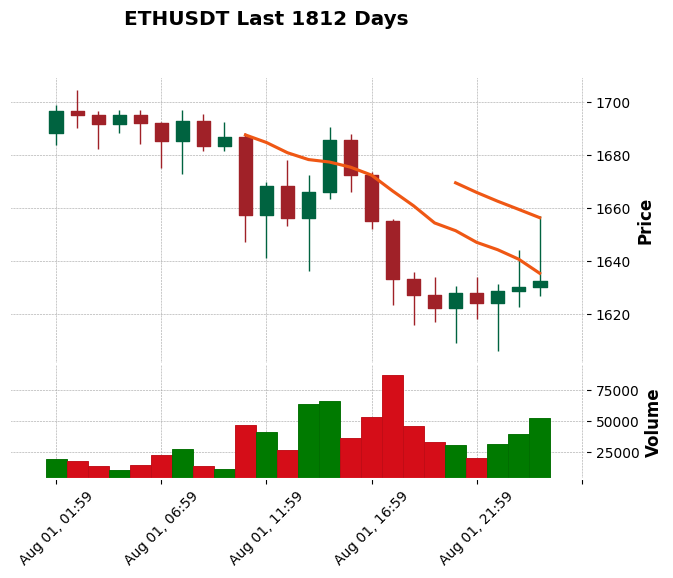

In [159]:
mpf.plot(DF.set_index('Close Time').tail(24), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHUSDT Last 1 Days', 
        mav=(10,20,30))

In [160]:
DF.to_csv("ETH_dataset_from_BINANCE_1H.csv")